# WSL2 Tutorial: How to Create the Perfect Linux Data Science Environment on Windows With WSL2
## Everything included: terminal, docker, anaconda, git, Jupyter Lab, and so on...

### What is WSL and why do you need it?

### 1. Uninstall existing installation (optional)

In case you are reading this guide with an already installed WSL on your machine and want to start from the scratch for whatever reasons, you can go to Windows Settings > Apps and delete the Linux distro you installed:

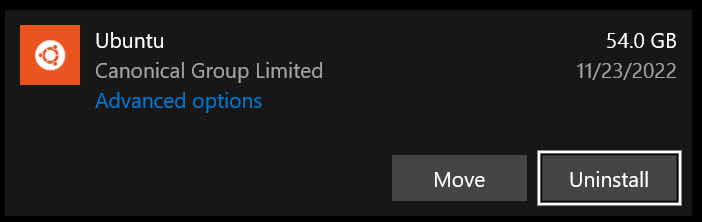

For most people, it is Ubuntu, but you may have installed others like Debian. 

Even if your WSL installation works well, I recommend installing it fresh following this guide, because you may have caused some disruptive changes to your installation that would prevent implementing some of the steps in the guide.

### 2. Install Docker Desktop if you haven't already

Most Windows data science users have Docker installed as it is a critical tool in many applications. To check the installation, go to the Command Prompt (CMD) and type `docker -v`. If it returns the Docker version, ignore this step. 

Otherwise, go to this [Docker installation page](https://docs.docker.com/desktop/install/windows-install/) and follow the instructions there.

### 3. Check prerequisites

WSL2 has a few system requirements other than Docker. Specifically, you must have Windows 10 version 2004 or higher (Build 19041 and higher) or Windows 11. To check the Windows build version, go to Settings > System > About and scroll down to Windows specifications. You will find the OS build and version there. 

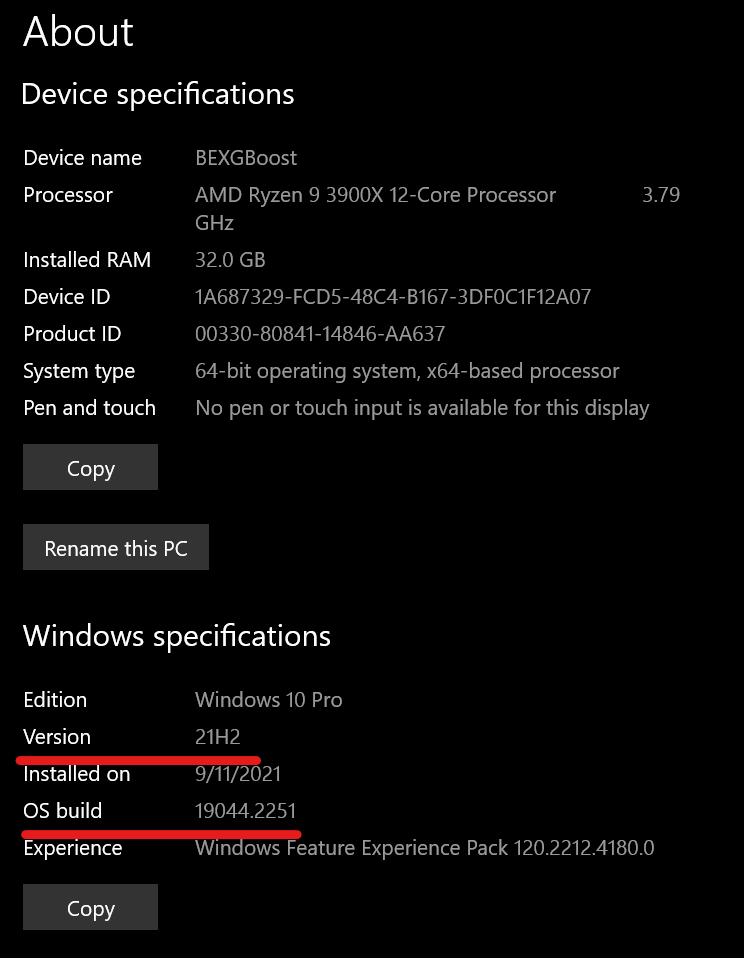

### 4. How to install WSL2

If the prerequisites are met, you will only need to a single command to install a fully-functional Linux distribution on Windows:

```
wsl --install -d Ubuntu
```

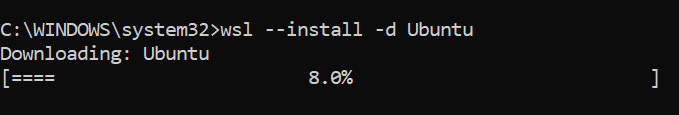

The above command should be run on a command prompt that was opened with administrator privileges (you can do so by typing `cmd` in the Start menu, right clicking on the result and choose "Run as administrator" option).

We are using the `-d` tag of the `wsl` command to specify that we want the Ubuntu distribution, which is the most common. There are of course others, but I suggest using Ubuntu as there is much more information about it on the Internet compared to other distros, so you will have an easier time if you encounter any errors once you finish this tutorial.

To check if the installation was successful, run the `wsl -l -v` command on the CMD to see the version.

```bash
$ wsl -l -v
  NAME                   STATE           VERSION
* Ubuntu                 Running         2
```

If you think this was easy, hold your judgment. We only started going down the rabbit hole as the most painful part of WSL2 is configuring and setting it up for data science and ML work. 

### 5. Setup a username and account

Once the installation is finished on the CMD, you will see an application called Ubuntu in the Start menu:

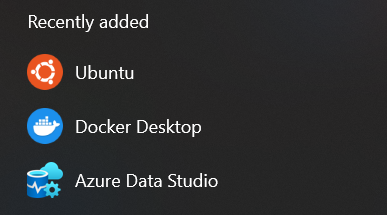

When you open it for the first time, you will encounter the following messages:

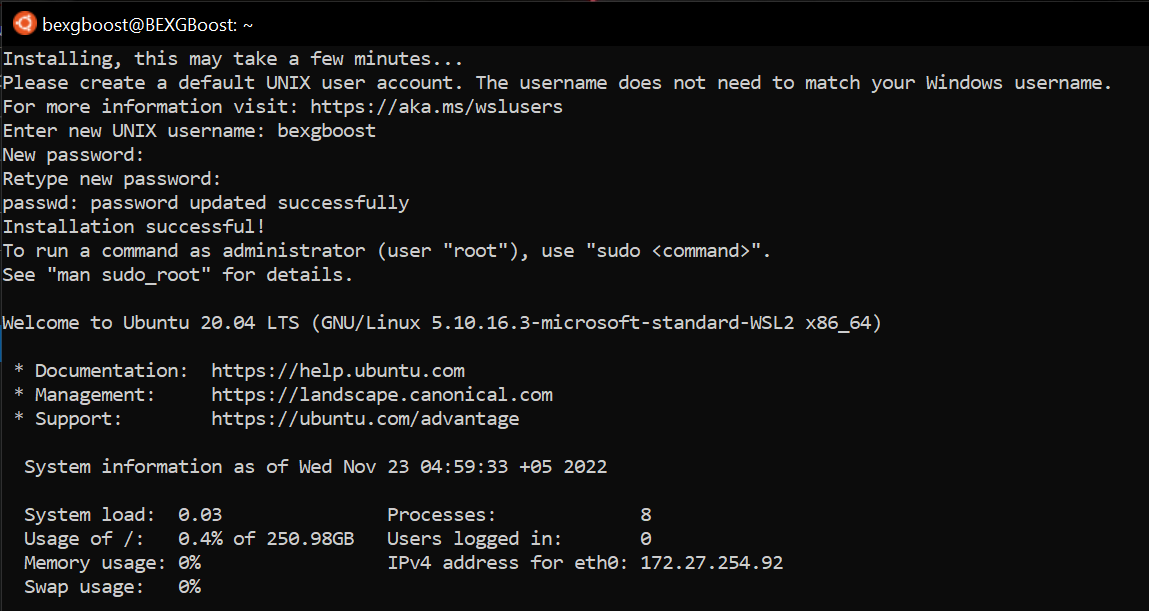

As you can see, it asks you to create a UNIX user account, which is similar to a Windows user account. I set mine to `bexgboost` and also set a password. I recommend choosing a different username for your UNIX account from your Windows username to avoid confusion. But you can set the same password, so that you don't have to remember to passwords.

Below the success message, the terminal is telling to use the `sudo` command, which stands for "Super User Do". As you start using this Linux terminal, you will encounter that some commands don't run without administrator consent. Adding the `sudo` keyword before that command tells the terminal you are the administrator for the current UNIX user account. When you use the `sudo` command, the terminal occasionally asks the password you've just set. 

For the rest of the tutorial, we will be running commands that affects both Windows and the Linux system we've just installed. When I ask you to run a command on the CMD, I am referring to the Windows Command Prompt. When I say "the terminal", I am referring to the Ubuntu terminal of Linux. 

### 6. How to update and upgrade packages on WSL2

As Linux is free and open-source operating system, its packages and libraries are regularly updated. Besides, when you install new packages or technologies, they may affect the core libraries. 

To update them, use the command below:

`sudo apt update && sudo apt upgrade`

These commands are similar to the Windows Update system but less hassle-free and much faster. The `update` command downloads new library/package changes while the `upgrade` command implements them.

### 7. Understanding the file system in WSL2

The way you will interact with WSL2 will be significantly different than Windows.

In Windows, you used both the CMD and the File Explorer to interact with files, folders and applications. In WSL2, you will mostly be using the terminal to interact with everything.

In simple words, your WSL2 installation does not come with any Graphical User Interface (GUI). This means you will have to forget installing/using/deleting apps with the mouse or actually seeing/modifying the installed applications in some type of GUI.

For many, this might seem like a limitation, but once you get the hang of Linux terminal, you will see that interacting with an operating system only through the terminal is much faster, offers a lot of flexibility, and makes you look like a hacker.

Think of WSL2 as another application with its own destination folder in the Windows file system. The WSL2 folder is found under the path `\\wsl$\Ubuntu`.

You can access that folder by opening the terminal and typing the command—`cd /`. This folder contains all the files required to run WSL2 stable. 

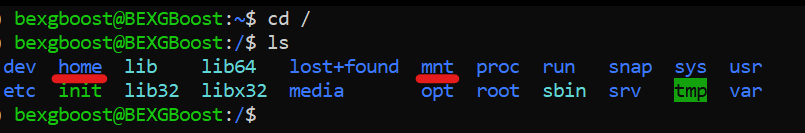

You will almost never use the files and directories in this path except for two: `home` and `mnt` folders. The `home` folder contains user-specific data and is similar to the Windows path "C:\Users\username". 

Change the directory to the home folder (`cd home`) and you will see that it contains only a single directory named under your UNIX username you set up in section 5.

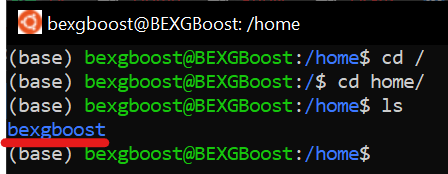

When you start the Ubuntu terminal, it will always set the current directory to that folder - `/home/username`. For this reason, it is called the root directory. To go to the root directory from anywhere on the WSL2 system, type `cd ~` or simply `cd` without any arguments and it will take you there.

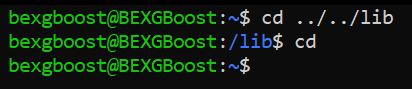

Now, go back to the WSL2 installation folder by typing `cd /`. We will inspect the `mnt` folder. By typing `ls mnt`, we can see all the contents within:

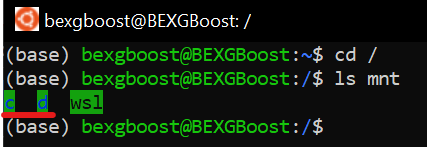

It contains three directories, but we only care about `c` and `d`. Those directories are linked to the C and D disks of your Windows installation. 

For example, before WSL2, I stored all my code and projects in the Desktop folder. I can list them from the root directory by typing `ls /mnt/c/users/bex/Desktop`:

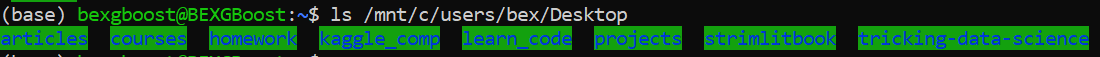

To copy them into my Linux user directory, the root, I can run the following command:

```
cp /mnt/users/bex/Desktop/* .
```

To check if the command was successful, you can run `ls`:

```
$ ls

articles  courses  homework  kaggle_comp  learn_code  projects  strimlitbook  tricking-data-science
```

One thing we haven't covered is the `explorer.exe` command. Since WSL2 application is just another folder mounted on top of your Windows system, you can open it with the File Explore. Typing `explorer.exe .` anywhere on the terminal will open up the File Explorer for that folder:

![](images/file_explorer.gif)

So, as a summary, the two most important directories of WSL2 is the `mnt` and `home`. While you can access the C and D disks of Windows from `mnt`, the root directory is the `home/username`, which is the default directory whenever you launch WSL2 through the terminal.

### 8. How to install Visual Studio Code for WSL2

I mentioned that GUI applications aren't generally available for WSL2. However, there is an exception for VSCode. You can open an WSL2 folder as a VSCode project via a single command.

To do so, you must have VSCode already installed on your Windows. Then, to link WSL2 to VSCode, you have to install the [Remote Extension Development Pack](https://marketplace.visualstudio.com/items?itemName=ms-vscode-remote.vscode-remote-extensionpack) extension from the extensions menu and relaunch VSCode if you have it open. 

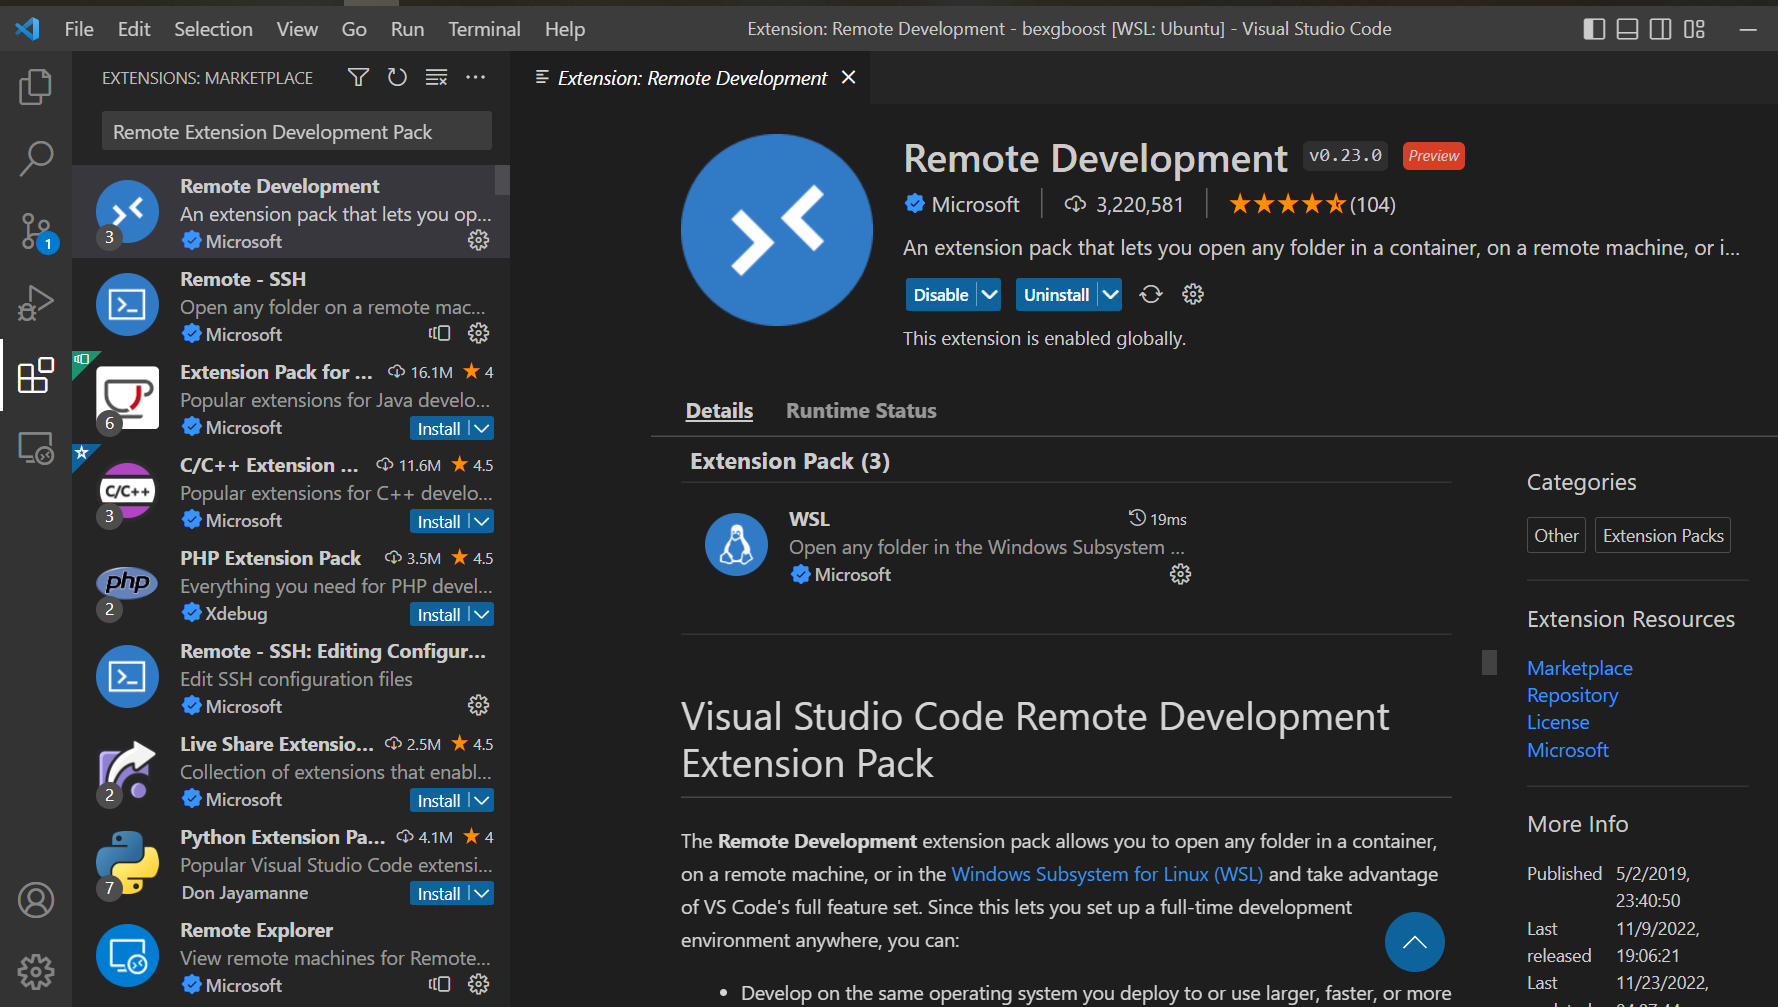

Then, go to the terminal and update/upgrade packages with `sudo apt update && sudo apt upgrade`. Then, change into any directory and run `code .` to open a VSCode project for the folder.

![](images/vscode.gif)

Above, I opened the root directory with VSCode. The best thing about this method is that you don't have two separate installations of VSCode. All the settings and extensions of your Windows VSCode installation will apply to WSL2 folders as well.

### 9. How to install and set up Git for WSL2

1. Check the version first
2. If not available, run `sudo apt-get install git`
3. Run `git --version` again.

### 10. Install Docker for WSL2

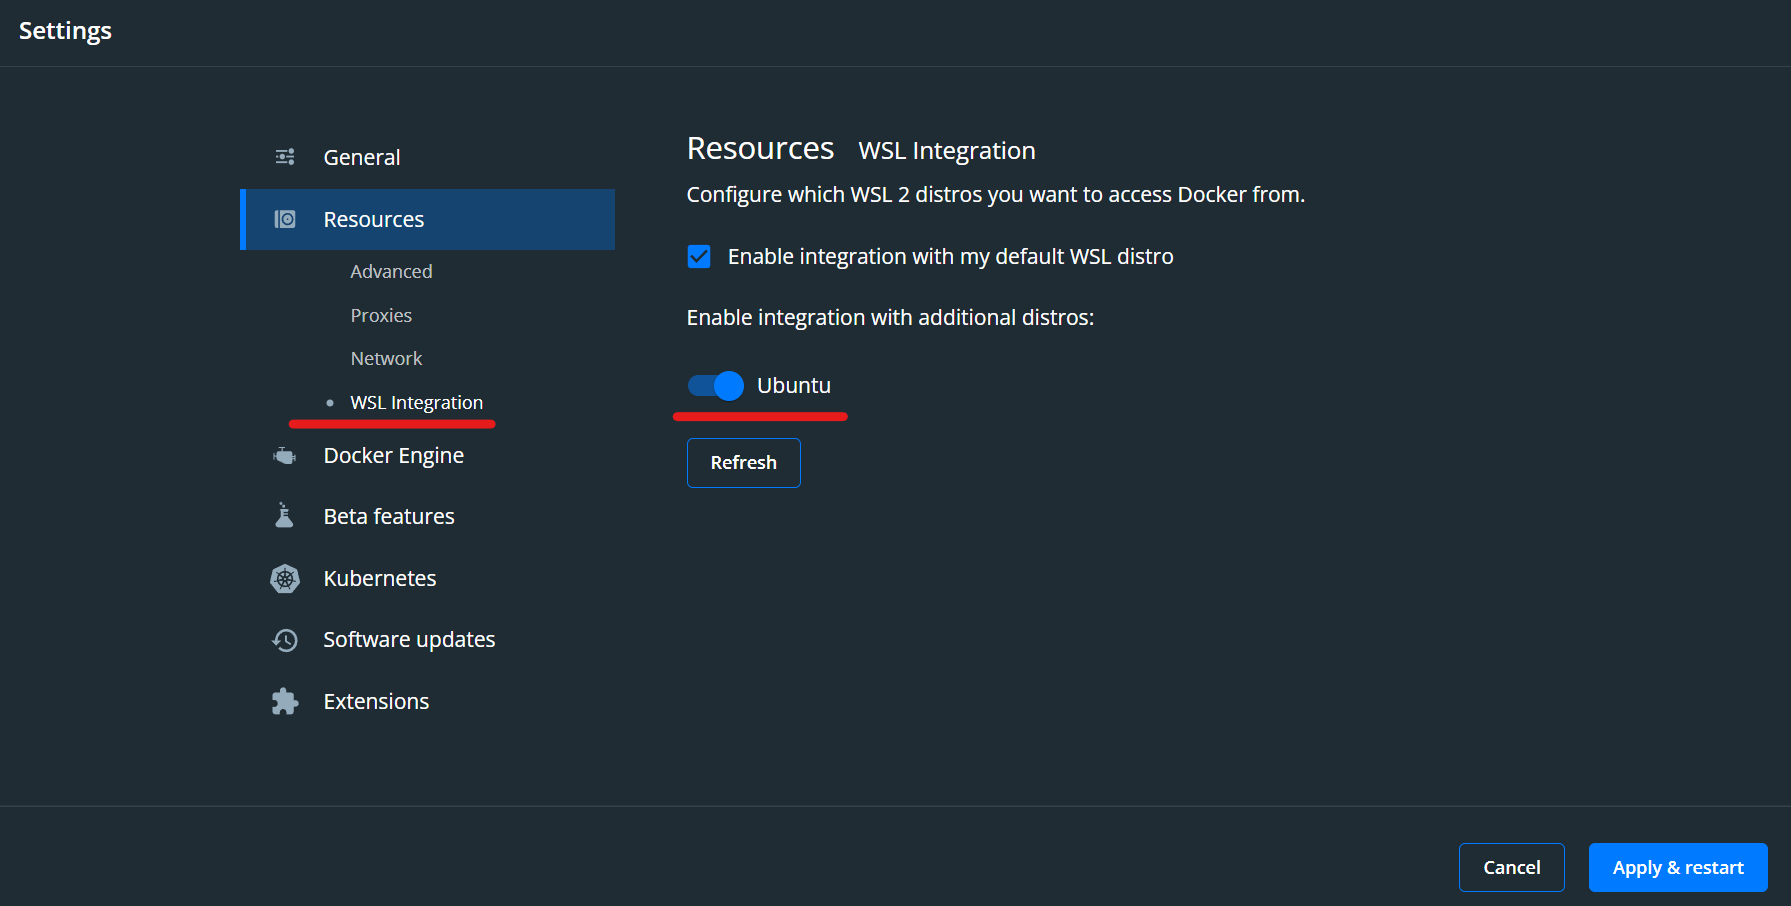

### 11. How to install Anaconda on WSL2

1. Go to https://www.anaconda.com/products/distribution
2. Find the distribution:
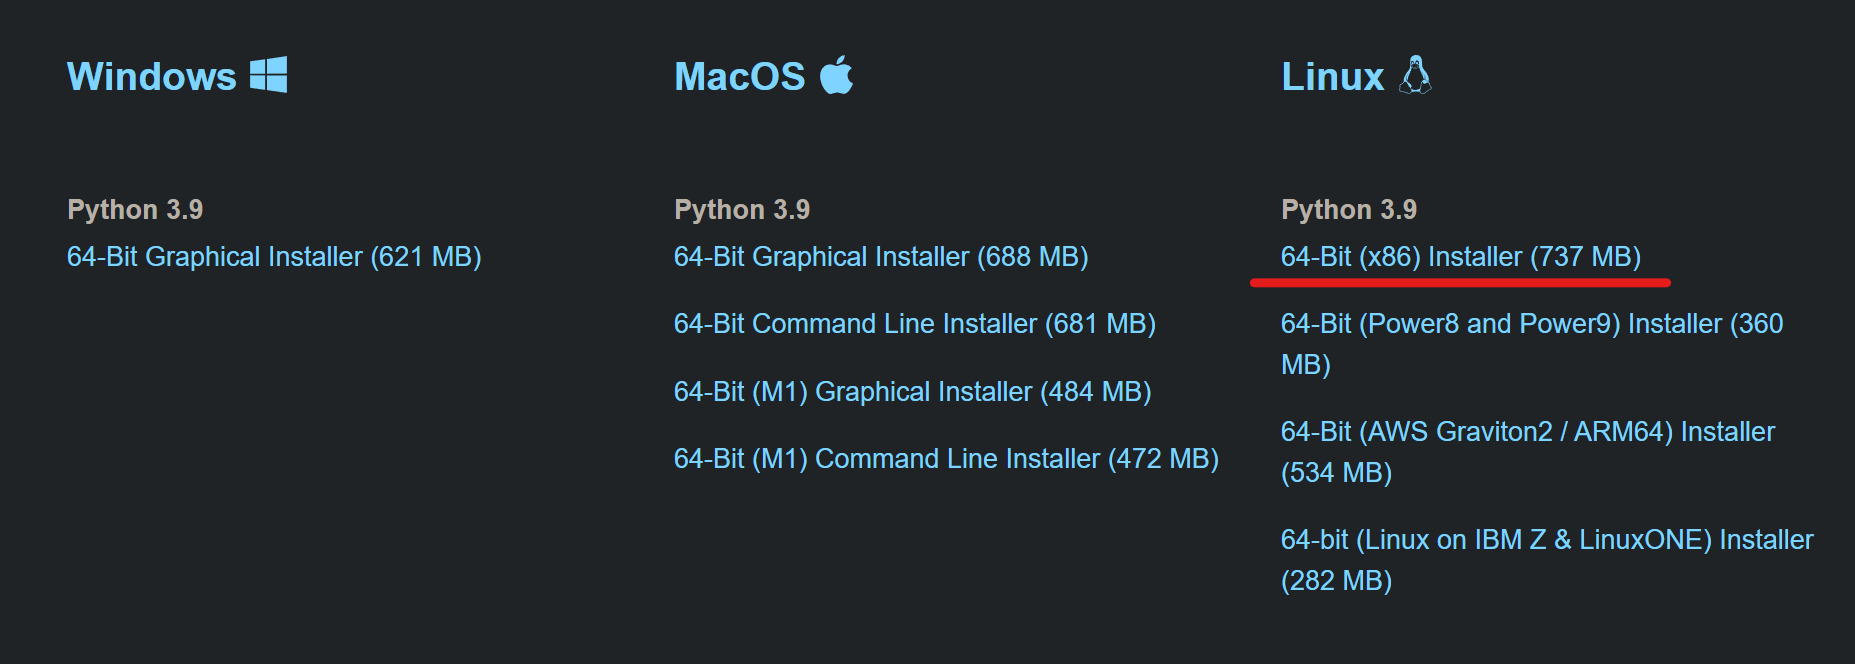

3. Copy the download link and download the installation file:

```
wget https://repo.anaconda.com/archive/Anaconda3-2022.10-Linux-x86_64.sh
```

4. Install the file
```
bash Anaconda3-2022.10-Linux-x86_64.sh
```

First, press ENTER multiple times. Then, it asks two yes/no questions. Answer yes both times.

5. Check conda version and Python installation.
Close/open the current Ubuntu tab.

```
conda --version
which python
```

### 12. How to install Jupyter Lab on WSL2

1. Install in the base env
```
conda install -c conda-forge jupyterlab
```

2. Run without browser:

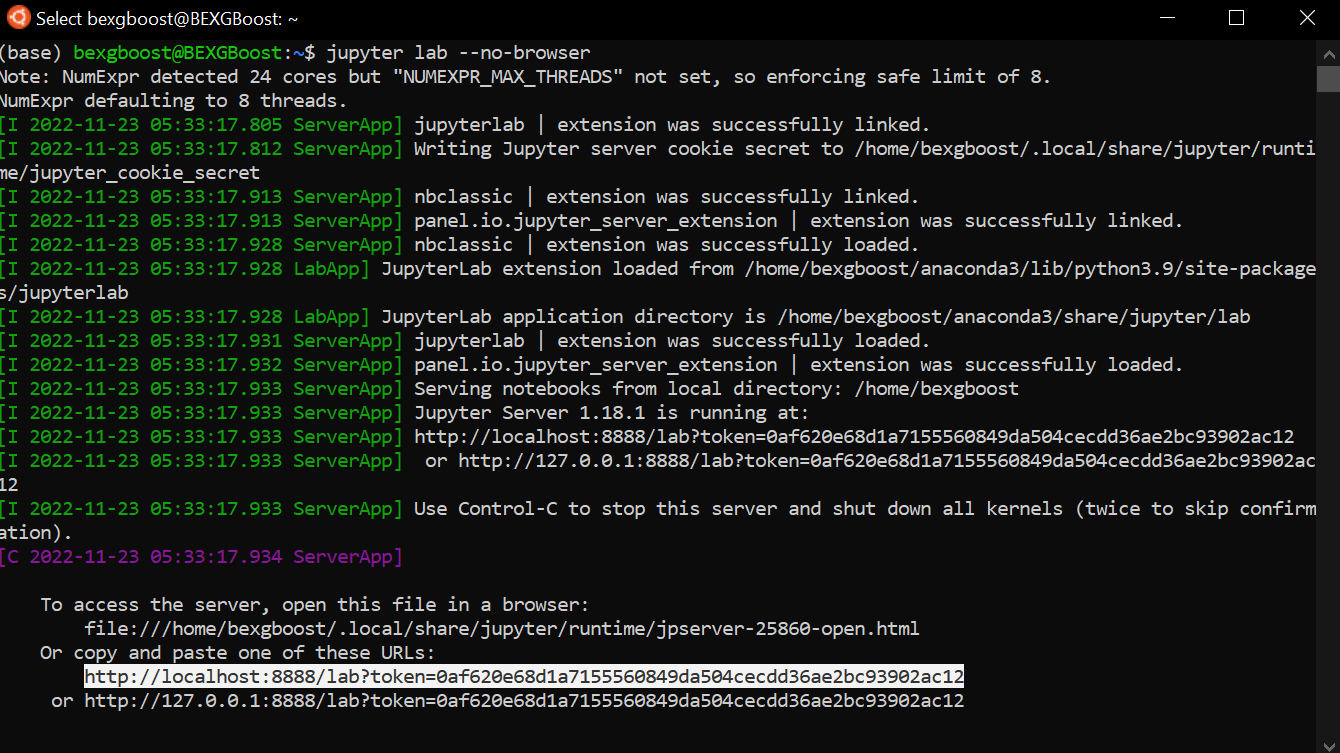

3. Create and add conda environments to Jupyter Lab on WSL2.

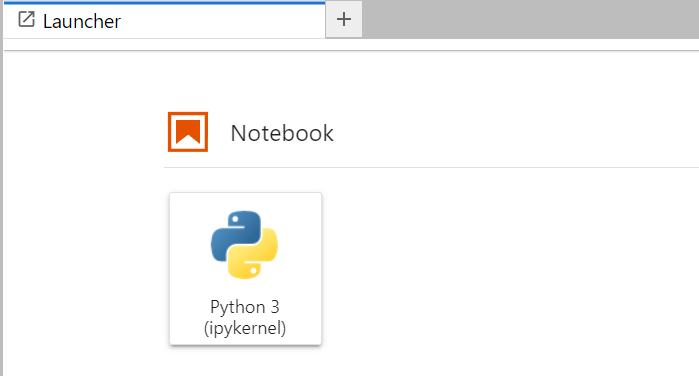

```
conda create -n new_env -y
pip install ipykernel
ipython kernel install --user --name=new_env
```

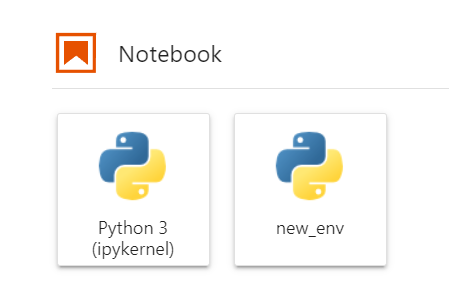

### 13. How to install spellchecker and code formatter for Jupyter Lab (optional)

```
pip install jupyterlab-spellchecker
pip install jupyterlab-code-formatter
pip install black isort
```

![](images/extensions.gif)

Check the settings > Advanced Settings Editor, Open JSON settings button on the right

### 14. How to format the WSL2 terminal (optional)

Gist for formatting the terminal: https://gist.github.com/65dc419af0efa723fc78e269a286ec52.git

### 15. How to add WSL2 Linux terminal as a PyCharm builtin terminal (optional)

```
wsl.exe --distribution Ubuntu
```

![](images/change_terminal.gif)

### 16. How to install TensorFlow with GPU support on WSL2

Make sure the guide is followed: https://towardsdatascience.com/how-to-finally-install-tensorflow-gpu-on-windows-10-63527910f255

Remove the old key: https://towardsdatascience.com/how-to-finally-install-tensorflow-gpu-on-windows-10-63527910f255

```
sudo apt-key del 7fa2af80
```